In [1]:
import synthx as sx

### sensitivity check

In [2]:
df = sx.sample(
    n_units=20,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=2,
    intervention_units=[1, 2, 3, 4, 5],
    intervention_time=40,
    intervention_effect=1,
    noise_effect=0.2,
    scale=2,
    seed=42,
)

In [3]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns=['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=[1, 2, 3, 4, 5],
    intervention_time=40,
)

In [4]:
effects_test, effects_placebo, sc_test, scs_placebo = sx.placebo_test(dataset)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 225.63it/s]


In [5]:
sx.stats.calc_p_value(effects_test, effects_placebo)

0.6175618586931115

In [6]:
sx.placebo_sensitivity_check(dataset, effects_placebo, r=1.1, write_progress=True)

uplift: 1.0250, p value: 0.11318802929132604.
uplift: 1.0312, p value: 0.04072138210563993.
uplift: 1.0328, p value: 0.031042864206430463.
7it [00:00, 13.89it/s, uplift=1.0336]


1.03359375

In [7]:
sx.ttest_sensitivity_check(dataset, r=1.1, write_progress=True)

uplift: 1.0500, p value: 0.04791033487741129.
uplift: 1.0531, p value: 0.03527751247909651.
uplift: 1.0547, p value: 0.03024539988025674.
7it [00:00, 12.34it/s, uplift=1.0555]


1.05546875

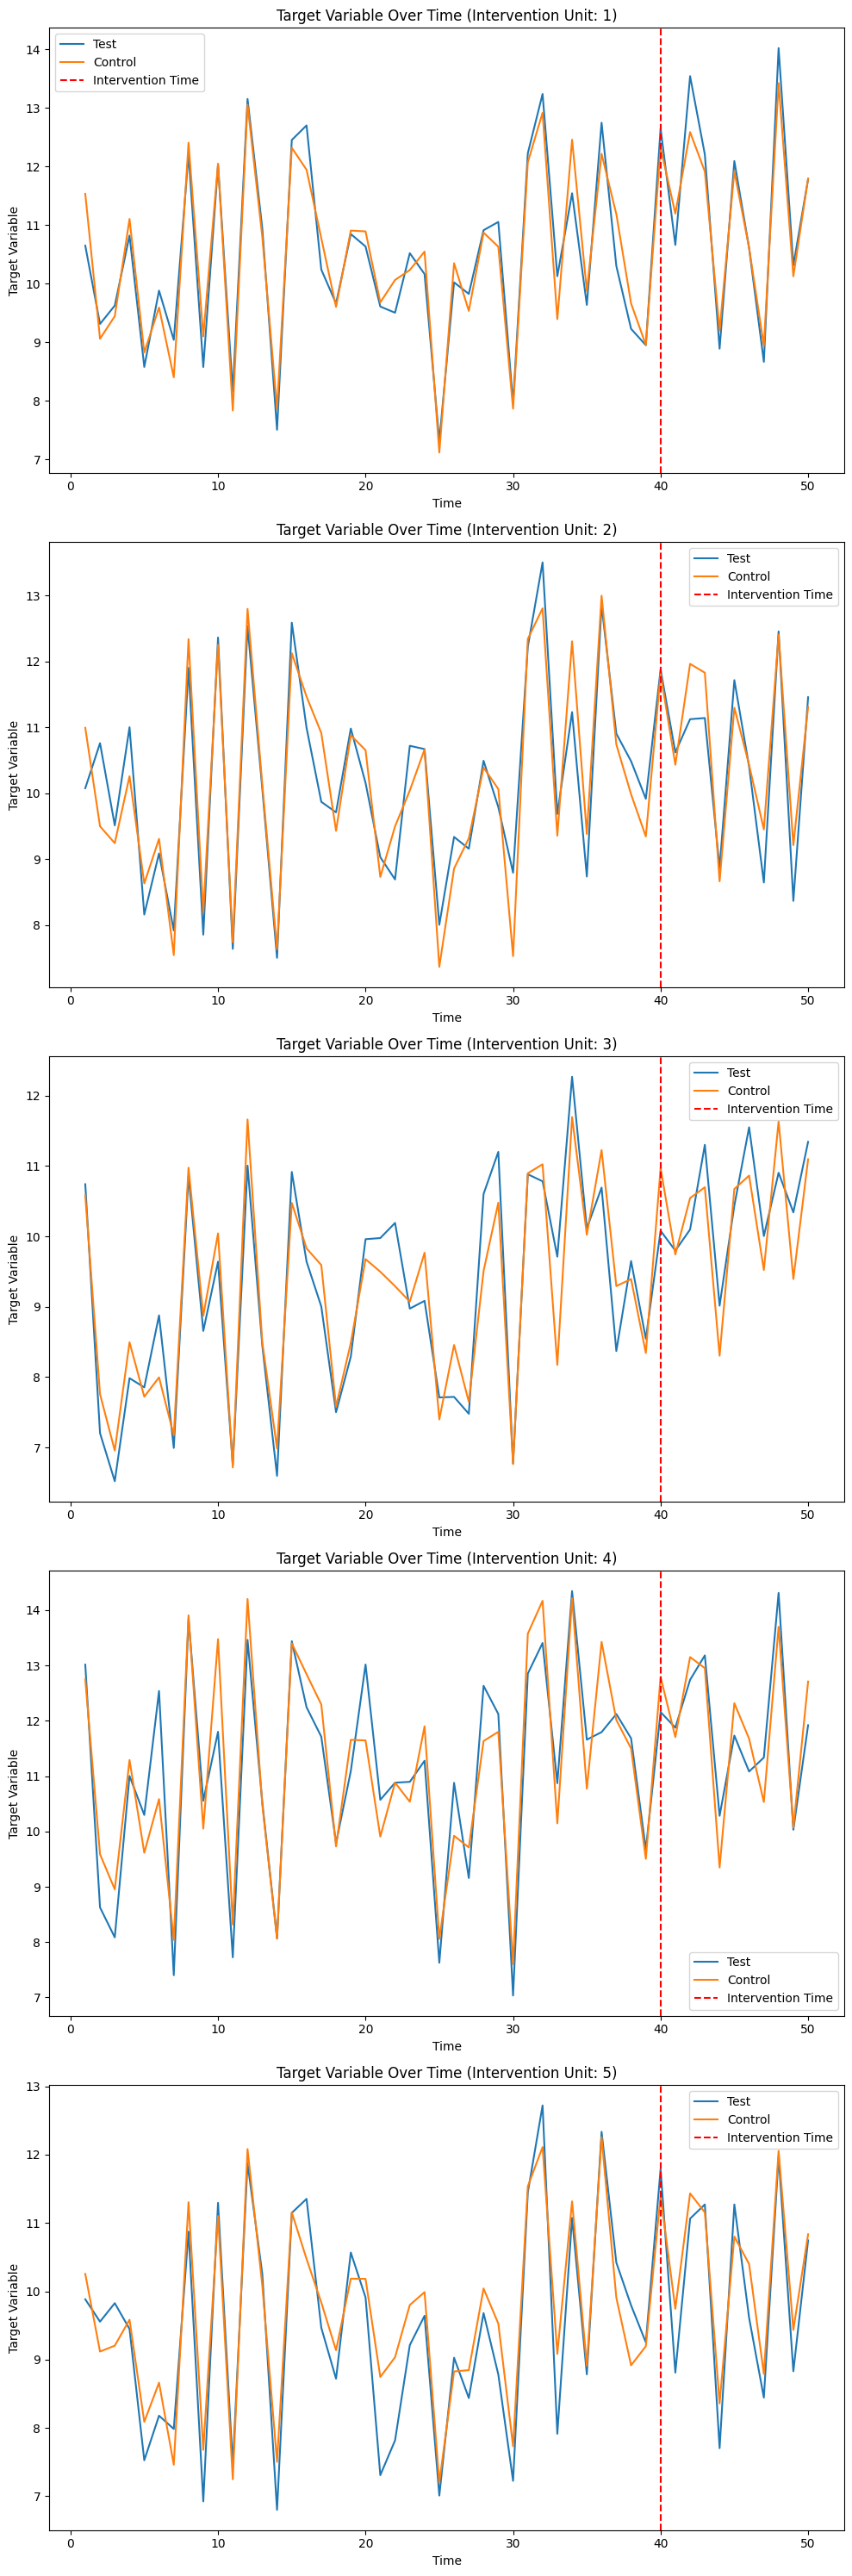

In [8]:
sc_test.plot()